In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [12]:
data = np.loadtxt('/home/chris/PythonAdvanced/090924/time_BHillustris1_30.dat', usecols=(6, 7))
# Swap the values if m1 is less than m2
m1 = np.maximum(data[:, 0], data[:, 1])
m2 = np.minimum(data[:, 0], data[:, 1])

In [5]:
# Define the bin size and range
delta_m = 0.5  # Bin width in solar masses
min_mass = 0   # Minimum mass
max_mass = 100 # Adjust based on the mass range in the dataset

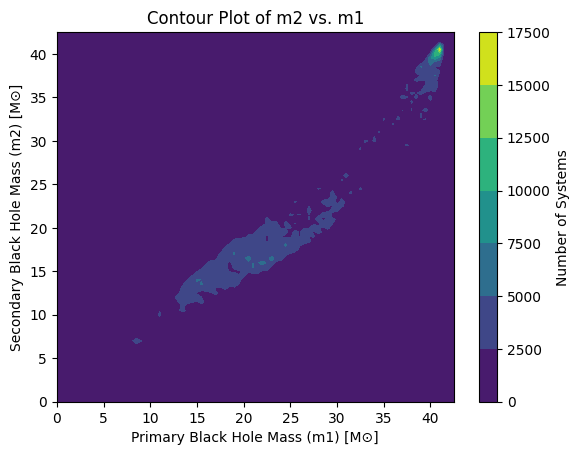

In [13]:
# Define the mass bin edges (with step size of 0.5 M⊙)
bin_width = 0.5
bins = np.arange(0, np.max(m1), bin_width)

# Calculate the 2D histogram of m1 and m2
hist, xedges, yedges = np.histogram2d(m1, m2, bins=[bins, bins])

# Plot the contour map
plt.contourf(xedges[:-1], yedges[:-1], hist.T, cmap='viridis')
plt.colorbar(label='Number of Systems')
plt.xlabel('Primary Black Hole Mass (m1) [M⊙]')
plt.ylabel('Secondary Black Hole Mass (m2) [M⊙]')
plt.title('Contour Plot of m2 vs. m1')
plt.show()